# <span style="color:#0b486b">Visualization</span>

---

---

Importing the required packages. We will work with `matplotlib` package to viualialize


In [23]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data from vsc file. Show the summary of data.

In [24]:
data = pd.read_csv('PSID.csv')
#make married colom categorical
data['married'] = pd.Categorical(data['married'])
#print(data.head())
#print(data.dtypes)
data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


## <span style="color:#0b486b">1. Boxplot </span>

Draw boxplot diagrams to get initial insights on data

Draw boxplot for Kids

<Figure size 14400x7200 with 0 Axes>

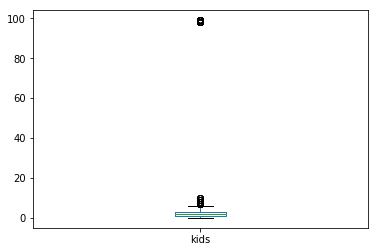

In [25]:
plt.figure(figsize=(200,100))
data.plot.box(y='kids')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

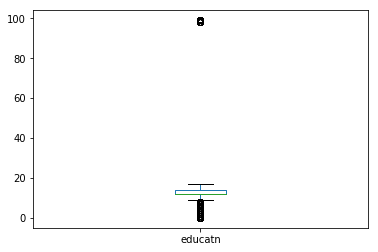

In [26]:
plt.figure(figsize=(200,100))
data.plot.box(y='educatn')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

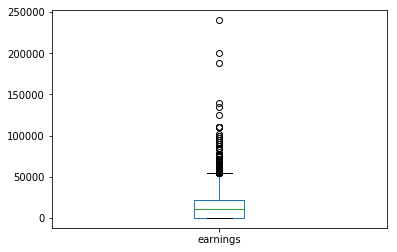

In [27]:
plt.figure(figsize=(200,100))
data.plot.box(y='earnings')
plt.show()

---
## <span style="color:#0b486b">Remove Outliers</span>

Remove outliers based on boxplot diagrams

<Figure size 14400x7200 with 0 Axes>

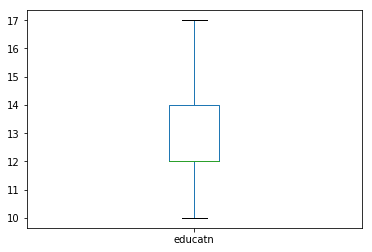

In [28]:
CleanedData = data[data.kids < 15]
CleanedData = CleanedData[CleanedData.educatn < 30]
CleanedData = CleanedData[CleanedData.educatn >= 10]
plt.figure(figsize=(200,100))
CleanedData.plot.box(y='educatn')
plt.show()
CleanedData.describe()

CleanedData.to_csv('CleanedData.csv')

---
## <span style="color:#0b486b">Correlation </span>

Correalation between columns

We can see 0.611034 realtionship between worked hours and earnings

We can see 0.364995 realtionship between education and earnings

We are using these insights on some of our hypothesis


In [29]:
data = pd.read_csv('CleanedData.csv')
data = data.iloc[:,1:-1]
del data['Seq No']
del data['persnum']
del data['intnum']

data.corr(method ='pearson') 


,age,educatn,earnings,hours,kids
age,1.000000,0.034053,0.113953,0.080526,0.132700
educatn,0.034053,1.000000,0.364995,0.114666,-0.218916
earnings,0.113953,0.364995,1.000000,0.611034,-0.233729
hours,0.080526,0.114666,0.611034,1.000000,-0.172628
kids,0.132700,-0.218916,-0.233729,-0.172628,1.000000


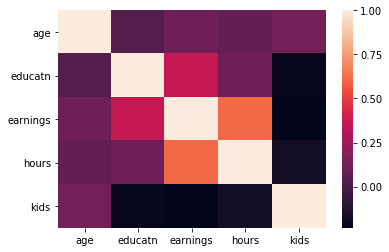

In [30]:
corr = data.corr()
sns.heatmap(corr)

---
## <span style="color:#0b486b">Hypothesis 1</span>

<strong>Eduation has an positive impact on a persons earnings.</strong>

If correlation is c

<ul>
    <li>H0 : c = 0</li>
    <li>Ha : c > 0</li>
</ul>



from above correlation table, c between education and earnings is 0.364995 (c > 0)

therefore, <strong>statistics support for alternative hypothesis with suffiecnt statistical significance.</strong>

but, Using other means to confirm it (p value and scatter plot)


Let's see the scatter plot for above relationship


<Figure size 14400x7200 with 0 Axes>

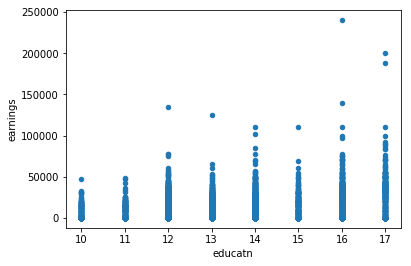

In [31]:
data = pd.read_csv('CleanedData.csv')
data.corr(method ='pearson') 
plt.figure(figsize=(200,100))
data.plot.scatter(x='educatn', y='earnings')
plt.show()

Since we cannot get a clear idea from above chart, trying caluclations from pearsonr correaltion

<Strong>P Value</Strong>

We will select a significance level (99%) (α = 0.01),

In [32]:
from scipy.stats import pearsonr

educationArray = []
earningArray = []


for index, row in data.iterrows():
    if(row['hours']>0):
        educationArray.append(row['educatn'])
        earningArray.append(row['earnings'])
    
#print(educationArray)
#print(earningArray)
    
corr, p_value = pearsonr(educationArray, earningArray)
print('correaltion=', round(corr, 2), ',  p value=', round(p_value, 2))

correaltion= 0.37 ,  p value= 0.0


P value is less than α, (0 < 0.01), Therefore, null hypothesis is rejected.

Conclusion: There is sufficient evidence to conclude there is a significant linear relationship between <strong>Eduation</strong> and <strong>Earnings</strong>

---
## <span style="color:#0b486b">Hypothesis 2</span>

<strong>Married people earn more than others</strong>

M1 : mean of earning of married people
M2 : mean of earning of unmarried people


H0 : M1 = M2

Ha : M1 > M2



In [45]:
###function to convert categorical data to numerical value
def marritialStatus_to_numeric(x):
    if x=='married':
        return 1
    else:
        return 0

###append new colomn IsMarried; a numerical representation of categorical value
data['IsMarried'] = data['married'].apply(marritialStatus_to_numeric)

marriedPeople = data[data.IsMarried == 1]
UnMarriedPeople = data[data.IsMarried== 0]

#unmarriedData = data[data.married!='married'].head(n=100)


See Married people data 

In [46]:
marriedPeople.describe()

,Unnamed: 0,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,IsMarried
count,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.0
mean,2087.943778,2088.943778,3909.615442,73.701274,38.411919,13.342204,16186.235007,1319.390555,2.136807,1.0
std,1364.414841,1364.414841,2720.817856,83.287961,5.480794,1.889184,16870.971856,885.305261,1.261329,0.0
min,0.000000,1.000000,4.000000,1.000000,30.000000,10.000000,0.000000,0.000000,0.000000,1.0
25%,929.750000,930.750000,1494.000000,3.000000,34.000000,12.000000,2300.000000,381.250000,1.000000,1.0
50%,1868.500000,1869.500000,2753.000000,5.000000,38.000000,12.000000,13000.000000,1603.000000,2.000000,1.0
75%,3204.500000,3205.500000,6187.000000,171.000000,43.000000,15.000000,25000.000000,2000.000000,3.000000,1.0
max,4855.000000,4856.000000,9306.000000,200.000000,50.000000,17.000000,240000.000000,4233.000000,10.000000,1.0


See UnMarried people data 

In [47]:
UnMarriedPeople.describe()

,Unnamed: 0,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,IsMarried
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.0
mean,2574.948994,2575.948994,4963.562500,34.600575,38.079023,12.864943,14664.219828,1321.415948,1.887213,0.0
std,1251.638815,1251.638815,2447.423907,65.574911,5.496441,1.810706,15463.541270,977.947905,1.488343,0.0
min,1.000000,2.000000,4.000000,1.000000,30.000000,10.000000,0.000000,0.000000,0.000000,0.0
25%,1695.000000,1696.000000,2538.250000,2.000000,33.000000,12.000000,606.000000,135.000000,1.000000,0.0
50%,2694.500000,2695.500000,5693.000000,4.000000,38.000000,12.000000,12000.000000,1655.500000,2.000000,0.0
75%,3571.750000,3572.750000,6584.500000,7.000000,42.000000,14.000000,23000.000000,2040.000000,3.000000,0.0
max,4849.000000,4850.000000,9293.000000,195.000000,50.000000,17.000000,140000.000000,5025.000000,9.000000,0.0


In [48]:
#see the corelation
data.corr(method ='pearson') 


,Unnamed: 0,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,IsMarried
Unnamed: 0,1.000000,1.000000,0.982993,-0.247615,-0.044440,-0.191249,-0.136180,-0.068794,0.086735,-0.171677
Seq No,1.000000,1.000000,0.982993,-0.247615,-0.044440,-0.191249,-0.136180,-0.068794,0.086735,-0.171677
intnum,0.982993,0.982993,1.000000,-0.245670,-0.056530,-0.203563,-0.139795,-0.069258,0.091350,-0.186890
persnum,-0.247615,-0.247615,-0.245670,1.000000,-0.073616,0.100913,0.033118,0.020164,-0.040637,0.232459
age,-0.044440,-0.044440,-0.056530,-0.073616,1.000000,0.034053,0.113953,0.080526,0.132700,0.028797
educatn,-0.191249,-0.191249,-0.203563,0.100913,0.034053,1.000000,0.364995,0.114666,-0.218916,0.120761
earnings,-0.136180,-0.136180,-0.139795,0.033118,0.113953,0.364995,1.000000,0.611034,-0.233729,0.044014
hours,-0.068794,-0.068794,-0.069258,0.020164,0.080526,0.114666,0.611034,1.000000,-0.172628,-0.001047
kids,0.086735,0.086735,0.091350,-0.040637,0.132700,-0.218916,-0.233729,-0.172628,1.000000,0.087865
IsMarried,-0.171677,-0.171677,-0.186890,0.232459,0.028797,0.120761,0.044014,-0.001047,0.087865,1.000000


From the corelation diagram we cant see a significant relationship between maritial status and earnings. Corelation efficient is 0.044 betwween the marritial status and earnings. which we can consider as 0. 


However M1 = 16186.235007	
        M2 = 14664.219828	

Which implies M1 < M2. 

In conclusion we can say that Married people earn more than unmarried people.

